## ----------------------------------------------------Section - 3-----------------------------------------------------------
###                              3) Coventional Machine Learning Model - Random Forest Classifier

In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from os.path import join

In [2]:
# preliminary data Exploration 
hair_colours = ['black', 'blond', 'brown', 'gray']
dataset_directory = 'C:\\Users\\suhas\\Downloads\\ML Practice\\image_dataset'  ## CHANGE TO YOUR OWN DIRECTORY

images_train = np.load(join(dataset_directory, 'train_images.npy'))
labels_train = np.load(join(dataset_directory, 'train_labels.npy'))

image_size = 48
images_train_rs = images_train.reshape([-1, image_size, image_size, 3]) / 255.0

In [3]:
Features = images_train_rs.shape[1]*images_train_rs.shape[2]*images_train_rs.shape[3]
Features

6912

In [4]:
lst1 = [None] * images_train_rs.shape[0] # creating an empty array of size 98479
for i in range(images_train_rs.shape[0]):
    lst1[i] = images_train_rs[i].reshape([-1]) # reshaping each picture to 6912 features and storing it in lst1
#print(lst)
x = np.array(lst1).reshape(images_train_rs.shape[0],Features) # converting the list to an array
print(x.shape)

(98479, 6912)


In [5]:
tain1df = pd.DataFrame(x) # Converting Train Lables array into Data Frame

In [6]:
tain1df

,0,1,2,3,4,5,6,7,8,9,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,0.992157,0.905882,0.760784,0.992157,0.905882,0.760784,0.992157,0.905882,0.760784,0.992157,...,0.086275,0.478431,0.203922,0.090196,0.450980,0.184314,0.074510,0.431373,0.168627,0.062745
1,0.258824,0.200000,0.172549,0.266667,0.203922,0.172549,0.329412,0.258824,0.227451,0.411765,...,0.168627,0.388235,0.192157,0.141176,0.474510,0.305882,0.278431,0.541176,0.435294,0.419608
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.086275,0.192157,0.129412,0.078431,0.250980,0.211765,0.117647,0.294118,0.247059,0.160784
3,0.470588,0.286275,0.243137,0.486275,0.286275,0.247059,0.486275,0.294118,0.250980,0.447059,...,0.611765,0.647059,0.643137,0.662745,0.643137,0.639216,0.658824,0.635294,0.631373,0.650980
4,0.105882,0.105882,0.129412,0.125490,0.109804,0.129412,0.074510,0.074510,0.078431,0.490196,...,0.117647,0.105882,0.101961,0.121569,0.101961,0.098039,0.117647,0.098039,0.094118,0.113725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98474,0.815686,0.843137,0.843137,0.772549,0.768627,0.780392,0.780392,0.756863,0.776471,0.835294,...,0.015686,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451
98475,0.952941,0.862745,0.886275,0.952941,0.862745,0.886275,0.952941,0.862745,0.886275,0.952941,...,0.062745,0.082353,0.066667,0.062745,0.082353,0.066667,0.062745,0.082353,0.066667,0.062745
98476,0.705882,0.635294,0.576471,0.709804,0.639216,0.588235,0.705882,0.635294,0.588235,0.701961,...,0.023529,0.019608,0.019608,0.011765,0.031373,0.031373,0.023529,0.035294,0.035294,0.027451
98477,0.392157,0.360784,0.317647,0.392157,0.360784,0.317647,0.392157,0.360784,0.317647,0.392157,...,0.121569,0.098039,0.125490,0.125490,0.105882,0.121569,0.125490,0.109804,0.125490,0.129412


In [12]:
labels_train[98474:]

array([3, 2, 2, 0, 0], dtype=int64)

In [8]:
tain2df = pd.DataFrame(labels_train) # gettin train labels into a dataframe
tain2df

,0
0,2
1,2
2,2
3,0
4,0
...,...
98474,3
98475,2
98476,2
98477,0


In [17]:
tain1df[1].head()

0    0.905882
1    0.200000
2    1.000000
3    0.286275
4    0.105882
Name: 1, dtype: float64

In [18]:
# merging the train images and labels together to a single frame
train_wholedata = tain1df.merge(tain2df, left_index=True, right_index=True)
train_wholedata.tail()

,0_x,1,2,3,4,5,6,7,8,9,...,6903,6904,6905,6906,6907,6908,6909,6910,6911,0_y
98474,0.815686,0.843137,0.843137,0.772549,0.768627,0.780392,0.780392,0.756863,0.776471,0.835294,...,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,0.027451,3
98475,0.952941,0.862745,0.886275,0.952941,0.862745,0.886275,0.952941,0.862745,0.886275,0.952941,...,0.082353,0.066667,0.062745,0.082353,0.066667,0.062745,0.082353,0.066667,0.062745,2
98476,0.705882,0.635294,0.576471,0.709804,0.639216,0.588235,0.705882,0.635294,0.588235,0.701961,...,0.019608,0.019608,0.011765,0.031373,0.031373,0.023529,0.035294,0.035294,0.027451,2
98477,0.392157,0.360784,0.317647,0.392157,0.360784,0.317647,0.392157,0.360784,0.317647,0.392157,...,0.098039,0.125490,0.125490,0.105882,0.121569,0.125490,0.109804,0.125490,0.129412,0
98478,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.976471,0.435294,0.494118,0.976471,0.435294,0.494118,0.976471,0.435294,0.494118,0


In [20]:
train_wholedata['0_y'].tail() #dispalying the last five lables

98474    3
98475    2
98476    2
98477    0
98478    0
Name: 0_y, dtype: int64

In [22]:
train_wholedata.shape # merged data frame shape

(98479, 6913)

In [23]:
images_val = np.load(join(dataset_directory, 'val_images.npy'))
labels_val = np.load(join(dataset_directory, 'val_labels.npy'))
files_val = np.load(join(dataset_directory, 'val_files.npy'))
images_val_rs = images_val.reshape([-1, image_size, image_size, 3]) / 255.0
Features1 = images_val_rs.shape[1]*images_val_rs.shape[2]*images_val_rs.shape[3]
Features1   # calculating the no of features for each picture

6912

In [24]:
lst3 = [None] * images_val_rs.shape[0] # creating an empty array of size 12270
for i in range(images_val_rs.shape[0]):
    lst3[i] = images_val_rs[i].reshape([-1]) # reshaping each picture to 6912 features and storing it in lst3
#print(lst)
y = np.array(lst3).reshape(images_val_rs.shape[0],Features1) # converting the list to an array
print(y.shape)

(12270, 6912)


In [25]:
tain3df = pd.DataFrame(y) # converting the valdation images data to a dataframe

In [26]:
tain4df = pd.DataFrame(labels_val) # converting lables of validation data to a dataframe

In [29]:
Val_wholedata = tain3df.merge(tain4df, left_index=True, right_index=True)
Val_wholedata.head() # merging validation lables and images into a single dataframe

,0_x,1,2,3,4,5,6,7,8,9,...,6903,6904,6905,6906,6907,6908,6909,6910,6911,0_y
0,0.925490,0.941176,0.952941,0.941176,0.956863,0.968627,0.976471,0.988235,1.000000,0.960784,...,0.105882,0.105882,0.105882,0.105882,0.105882,0.105882,0.098039,0.098039,0.098039,0
1,0.384314,0.345098,0.317647,0.231373,0.160784,0.133333,0.270588,0.172549,0.152941,0.274510,...,0.349020,0.250980,0.203922,0.349020,0.262745,0.211765,0.341176,0.258824,0.215686,2
2,0.000000,0.007843,0.003922,0.000000,0.007843,0.003922,0.000000,0.007843,0.003922,0.000000,...,0.239216,0.368627,0.454902,0.219608,0.458824,0.576471,0.211765,0.478431,0.627451,2
3,0.584314,0.372549,0.415686,0.356863,0.239216,0.470588,0.309804,0.258824,0.549020,0.329412,...,0.811765,0.384314,0.474510,0.811765,0.380392,0.482353,0.807843,0.384314,0.482353,0
4,0.760784,0.788235,0.890196,0.760784,0.788235,0.890196,0.752941,0.780392,0.882353,0.752941,...,0.623529,0.643137,0.721569,0.639216,0.658824,0.737255,0.643137,0.662745,0.741176,0


### Since SVM is costly (in terms of time consuming) to perform calculations on a large dataset like this. so, what I had done is made a datframe from the given data and selected a subsample (of size 19991 for training and 2008 for validation) randomly such that there will be less bias (but however there is bias in terms of propotion of data that is available for training and validating).

In [31]:
Train_sub_sample = train_wholedata.sample(frac=0.203) # selecting 20 percent of the data

In [32]:
Train_sub_sample.head()

,0_x,1,2,3,4,5,6,7,8,9,...,6903,6904,6905,6906,6907,6908,6909,6910,6911,0_y
35088,0.639216,0.764706,0.815686,0.647059,0.772549,0.823529,0.647059,0.772549,0.823529,0.647059,...,0.435294,0.509804,0.537255,0.431373,0.494118,0.533333,0.380392,0.431373,0.474510,2
197,0.552941,0.537255,0.290196,0.552941,0.537255,0.286275,0.545098,0.533333,0.274510,0.541176,...,0.227451,0.227451,0.227451,0.231373,0.231373,0.231373,0.227451,0.227451,0.227451,3
54028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.898039,0.674510,0.525490,0.901961,0.678431,0.525490,0.898039,0.674510,0.521569,2
74301,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,...,0.243137,0.239216,0.231373,0.149020,0.145098,0.137255,0.164706,0.160784,0.152941,0
79617,0.486275,0.486275,0.486275,0.490196,0.490196,0.490196,0.486275,0.486275,0.486275,0.466667,...,0.188235,0.188235,0.180392,0.172549,0.172549,0.164706,0.168627,0.168627,0.160784,0


In [36]:
Train_sub_sample.shape

(19991, 6913)

In [33]:
Val_sub_sample = Val_wholedata.sample(frac=0.171) # selecting 17% of the data as validation sample

In [34]:
Val_sub_sample.head()

,0_x,1,2,3,4,5,6,7,8,9,...,6903,6904,6905,6906,6907,6908,6909,6910,6911,0_y
6494,0.152941,0.152941,0.121569,0.152941,0.152941,0.121569,0.152941,0.152941,0.121569,0.160784,...,0.160784,0.176471,0.188235,0.152941,0.164706,0.176471,0.156863,0.172549,0.180392,3
5653,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,0.427451,...,0.752941,0.027451,0.074510,0.662745,0.011765,0.031373,0.603922,0.047059,0.098039,0
716,0.015686,0.035294,0.019608,0.015686,0.035294,0.019608,0.011765,0.031373,0.015686,0.015686,...,0.615686,0.631373,0.635294,0.584314,0.600000,0.603922,0.639216,0.654902,0.654902,0
5215,0.019608,0.054902,0.011765,0.011765,0.035294,0.023529,0.019608,0.027451,0.035294,0.015686,...,0.921569,0.823529,0.776471,0.949020,0.866667,0.815686,0.996078,0.917647,0.874510,2
10916,0.839216,0.819608,0.807843,0.839216,0.823529,0.811765,0.850980,0.850980,0.831373,0.858824,...,0.101961,0.062745,0.054902,0.105882,0.066667,0.058824,0.121569,0.082353,0.066667,0


In [35]:
# Train Sub sample 
Train_Sub_x = Train_sub_sample.drop(['0_y'], axis =1)
Train_Sub_y = Train_sub_sample['0_y']
print(Train_Sub_x.shape)
print(Train_Sub_y.shape)

(19991, 6912)
(19991,)


In [37]:
# validation sub sample
Val_Sub_x = Val_sub_sample.drop(['0_y'], axis =1)
Val_Sub_y = Val_sub_sample['0_y']
print(Val_Sub_x.shape)
print(Val_Sub_y.shape)

(2098, 6912)
(2098,)


### Model Fitting: 
We now fit the model using the training subsample data and validate the model using the validation subsample data.

In [38]:
from sklearn.svm import SVC
model = SVC(gamma='auto')
model = model.fit(Train_Sub_x, Train_Sub_y)
# 30 min

In [39]:
from sklearn.metrics import accuracy_score
Train_pred = model.predict(Train_Sub_x)
print("Accuracy score for Train is:",accuracy_score(Train_Sub_y, Train_pred))
Val_pred = model.predict(Val_Sub_x)
print("Accuracy score for validation is:",accuracy_score(Val_Sub_y, Val_pred))

Accuracy score for Train is: 0.7804512030413686
Accuracy score for validation is: 0.7569113441372736


### Result Interpretation for SVM with Default Parameters:
1. we can see that the accuracy scores of traing and validation data is looking good and are quite matching to the Random forest model score with best parameters even with training happened on a data set with 20000.
2. As the model seems promising we now try to change the Parametrs and find the model with optimal parameters for predicting. 

#### Parameter Tuninng for Random Forest:
SVM does allows a wide range of parameters to tune, but I will be looking at C, Gamma  

Step-7: C and Gamma Parameter Tuning 

In [40]:
# fitting the model for several C values
c = [10,25,50,75,100, 123]
Train_Acc_Score = []
Valid_Acc_Score = []
for e in c:
    model = SVC(C=e, gamma='auto', random_state = 26)
    model = model.fit(Train_Sub_x, Train_Sub_y)
    Val_pred = model.predict(Val_Sub_x)
    Val_Score = accuracy_score(Val_Sub_y, Val_pred)
    Valid_Acc_Score.append(Val_Score)
    print("Accuracy score with "+str(e)+" for C for validation is:",Val_Score)
    Train_pred = model.predict(Train_Sub_x)
    Train_Score = accuracy_score(Train_Sub_y, Train_pred)
    Train_Acc_Score.append(Train_Score)
    print("Accuracy score with "+str(e)+" for c for train is:",Train_Score)

Accuracy score with 10 for C for validation is: 0.8126787416587226
Accuracy score with 10 for c for train is: 0.8624380971437147
Accuracy score with 25 for C for validation is: 0.8260247855100096
Accuracy score with 25 for c for train is: 0.8922014906708019
Accuracy score with 50 for C for validation is: 0.8255481410867492
Accuracy score with 50 for c for train is: 0.9161622730228602
Accuracy score with 75 for C for validation is: 0.8236415633937083
Accuracy score with 75 for c for train is: 0.9345705567505378


KeyboardInterrupt: 

In [41]:
print(Train_Acc_Score)
print(Valid_Acc_Score)

[0.8624380971437147, 0.8922014906708019, 0.9161622730228602, 0.9345705567505378]
[0.8126787416587226, 0.8260247855100096, 0.8255481410867492, 0.8236415633937083]


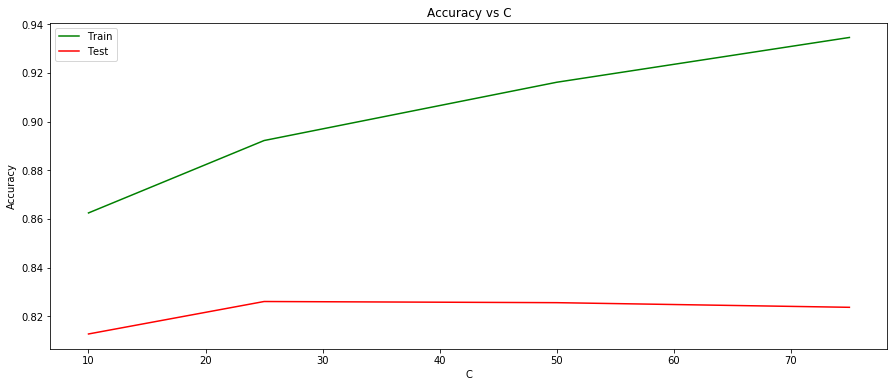

In [44]:
c = [10,25,50,75]
plt.figure(figsize=(15,6))
plt.plot(c, Train_Acc_Score,label = "Train", color='g')
plt.plot(c, Valid_Acc_Score, label = "Test", color='r')
plt.ylabel("Accuracy")
plt.xlabel("C")
plt.title("Accuracy vs C")
plt.legend()

#### Accuraacy Score interpretation:
As the SVM is very time consuming paramter tuning is taking too much time so, I did considered the accuracy score up untill C = 75 plus we can even see that there is no increase in validation accuracy score after C = 25 and the difference between the accuracy test score and validation score is increasing (which will eventualaly leads to overfitting). So from this Parameter tuning we consider to go further with C = 25.

#### Best Model:
So, we use C = 25 and Gamma = auto for fiiting the final model.

In [47]:
# reading the test data files
images_test_public = np.load(join(dataset_directory, 'test_public_images.npy'))
files_test_public = np.load(join(dataset_directory, 'test_public_files.npy'))
images_test_public_rs = images_test_public.reshape([-1, image_size, image_size, 3]) / 255.0

In [48]:
Features3 = images_test_public_rs.shape[1]*images_test_public_rs.shape[2]*images_test_public_rs.shape[3]
Features3

6912

In [49]:
lst4 = [None] * images_test_public_rs.shape[0] # creating an empty array of size 98479
for i in range(images_test_public_rs.shape[0]):
    lst4[i] = images_test_public_rs[i].reshape([-1]) # reshaping each picture to 6912 features and storing it in lst1
#print(lst)
z = np.array(lst4).reshape(images_test_public_rs.shape[0],Features3) # converting the list to an array
print(z.shape)

(11921, 6912)


In [53]:
model = SVC(C=25, gamma='auto', random_state = 26)
model = model.fit(Train_Sub_x, Train_Sub_y)
Val_pred = model.predict(z)


In [54]:
df1 = pd.DataFrame(Val_pred, columns=['Prediction'])
df1.tail() # creating a data frame for predicted values

,Prediction
11916,1
11917,1
11918,0
11919,0
11920,1


In [55]:
df2 = pd.DataFrame(files_test_public, columns=['ID'])
df2.tail() # creating a data frame for files_val which contains image names

,ID
11916,202595.jpg
11917,202596.jpg
11918,202597.jpg
11919,202598.jpg
11920,202599.jpg


In [56]:
# Joining the two data frames through the index
Test_Public_pred_Acc_testpurpose_45693242 = df2.merge(df1, left_index=True, right_index=True)

In [57]:
Test_Public_pred_Acc_testpurpose_45693242.head()

,ID,Prediction
0,182639.jpg,0
1,182640.jpg,2
2,182642.jpg,0
3,182643.jpg,0
4,182644.jpg,0


In [58]:
Test_Public_pred_Acc_testpurpose_45693242.tail()

,ID,Prediction
11916,202595.jpg,1
11917,202596.jpg,1
11918,202597.jpg,0
11919,202598.jpg,0
11920,202599.jpg,1


In [59]:
Test_Public_pred_Acc_testpurpose_45693242.to_csv (r'C:\\Users\\suhas\\Downloads\\ML Practice\\Svm_ConventionalModel_45693242.csv', index = False, header=True)